In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.optimizers import Adam
#import tensorflow as tf
from datetime import datetime 
from keras_unet_collection import models, losses
import cv2
from sklearn.utils import shuffle
from PIL import Image
import os
from PIL import Image
import pickle
from tensorflow.keras.callbacks import EarlyStopping
import os
import os 
import sys 
import random 
import pickle
import warnings
from tensorflow.keras.metrics import Recall, Precision
import numpy as np 
from time import time 
import matplotlib.pyplot as plt 
from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from keras.models import load_model
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.layers import Input, Dropout, Lambda, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Activation, add, multiply, UpSampling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K 
smooth = 1

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)
from tensorflow.keras import backend as K 
smooth = 1


def iou_score(y_pred, y_true, smooth=1):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    union = K.sum(y_true, -1) + K.sum(y_pred, -1) - intersection
    iou = (intersection + smooth)/(union + smooth)
    return iou
if __name__ == '__main__':
    gpu=int(input("Which gpu u want?"))
    os.environ["CUDA_VISIBLE_DEVICES"]=str(gpu)
    image_directory = '/home/pranab_2021cs25/Segmentation_data/Lung_infection_data/Infection_Segmentation_Data/Infection_Segmentation_Data/Train/COVID-19/images/'
    mask_directory = '/home/pranab_2021cs25/Segmentation_data/Lung_infection_data/Infection_Segmentation_Data/Infection_Segmentation_Data/Train/COVID-19/infection masks/'
    images=[]
    my_train_samples_covid_19=os.listdir(image_directory)
    
    for i in my_train_samples_covid_19:
        images.append(image_directory+i)
    
    print("appending masks")
    masks=[]
    my_train_samples_covid_19=os.listdir(mask_directory)
    
    for i in my_train_samples_covid_19:
        masks.append(mask_directory+i)
    
    print("shuffling images and masks")
    images=shuffle(images, random_state=0)
    masks=shuffle(masks,random_state=0)
    for i in images:
        x=cv2.imread(i)
        i=np.array(x)
        if i.shape!=(256,256,3):
            print(i.shape)
    for i in masks:
        x=cv2.imread(i)
        i=np.array(x)
        if i.shape!=(256,256,3):
            print(i.shape)
            
    print("creating image and mask dataset")
    image_dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
    mask_dataset = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.


    for i, image_name in enumerate(images):    #Remember enumerate method adds a counter and returns the enumerate object
        #if (image_name.split('.')[1] == 'tif'):
            #print(image_directory+image_name)

        img = Image.open(image_name).convert('L')
        image=np.array(img)
        #image = image.resize(image,(SIZE, SIZE))[:,:,0]
        image_dataset.append(image)

    #Iterate through all images in Uninfected folder, resize to 64 x 64
    #Then save into the same numpy array 'dataset' but with label 1


    for i, image_name in enumerate(masks):
        img = Image.open(image_name).convert('L')
        image=np.array(img)
        #image = image.resize(image,(SIZE, SIZE))[:,:,0]
        mask_dataset.append(image)

    #Normalize images
    print("doing expand dims")
    #mage_dataset=np.stack((image_dataset,)*3,axis=-1)
    train_image_dataset=np.expand_dims((np.array(image_dataset)),3)
    train_image_dataset = np.array(train_image_dataset)/255.
    
    #D not normalize masks, just rescale to 0 to 1.
    #mask_dataset=np.stack((mask_dataset,)*3,axis=-1)
    train_mask_dataset = np.expand_dims((np.array(mask_dataset)),3) /255.
    
    #now test data
    image_directory = '/home/pranab_2021cs25/Segmentation_data/Lung_infection_data/Infection_Segmentation_Data/Infection_Segmentation_Data/Test/COVID-19/images/'
    mask_directory = '/home/pranab_2021cs25/Segmentation_data/Lung_infection_data/Infection_Segmentation_Data/Infection_Segmentation_Data/Test/COVID-19/infection masks/'
    images=[]
    my_test_samples_covid_19=os.listdir(image_directory)
   
    for i in my_test_samples_covid_19:
        images.append(image_directory+i)

    print("appending masks")
    masks=[]
    my_test_samples_covid_19=os.listdir(mask_directory)
    
    for i in my_test_samples_covid_19:
        masks.append(mask_directory+i)
    
    print("shuffling images and masks")
    images=shuffle(images, random_state=0)
    masks=shuffle(masks,random_state=0)
    for i in images:
        x=cv2.imread(i)
        i=np.array(x)
        if i.shape!=(256,256,3):
            print(i.shape)
    for i in masks:
        x=cv2.imread(i)
        i=np.array(x)
        if i.shape!=(256,256,3):
            print(i.shape)
            
    print("creating image and mask dataset")
    image_dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
    mask_dataset = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.


    for i, image_name in enumerate(images):    #Remember enumerate method adds a counter and returns the enumerate object
        #if (image_name.split('.')[1] == 'tif'):
            #print(image_directory+image_name)

        img = Image.open(image_name).convert('L')
        image=np.array(img)
        #image = image.resize(image,(SIZE, SIZE))[:,:,0]
        image_dataset.append(image)

    #Iterate through all images in Uninfected folder, resize to 64 x 64
    #Then save into the same numpy array 'dataset' but with label 1


    for i, image_name in enumerate(masks):
        img = Image.open(image_name).convert('L')
        image=np.array(img)
        #image = image.resize(image,(SIZE, SIZE))[:,:,0]
        mask_dataset.append(image)

    #Normalize images
    print("doing expand dims")
    #mage_dataset=np.stack((image_dataset,)*3,axis=-1)
    test_image_dataset=np.expand_dims((np.array(image_dataset)),3)
    test_image_dataset = np.array(test_image_dataset)/255.
    
    #D not normalize masks, just rescale to 0 to 1.
    #mask_dataset=np.stack((mask_dataset,)*3,axis=-1)
    test_mask_dataset = np.expand_dims((np.array(mask_dataset)),3) /255.0
    
    
    
    
    #validation data
    image_directory = '/home/pranab_2021cs25/Segmentation_data/Lung_infection_data/Infection_Segmentation_Data/Infection_Segmentation_Data/Val/COVID-19/images/'
    mask_directory = '/home/pranab_2021cs25/Segmentation_data/Lung_infection_data/Infection_Segmentation_Data/Infection_Segmentation_Data/Val/COVID-19/infection masks/'
    images=[]
    my_val_samples_covid_19=os.listdir(image_directory)
    
    for i in my_val_samples_covid_19:
        images.append(image_directory+i)
    
    print("appending masks")
    masks=[]
    my_val_samples_covid_19=os.listdir(mask_directory)
   
    for i in my_val_samples_covid_19:
        masks.append(mask_directory+i)
    
    print("shuffling images and masks")
    images=shuffle(images, random_state=0)
    masks=shuffle(masks,random_state=0)
    for i in images:
        x=cv2.imread(i)
        i=np.array(x)
        if i.shape!=(256,256,3):
            print(i.shape)
    for i in masks:
        x=cv2.imread(i)
        i=np.array(x)
        if i.shape!=(256,256,3):
            print(i.shape)
            
    print("creating image and mask dataset")
    image_dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
    mask_dataset = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.


    for i, image_name in enumerate(images):    #Remember enumerate method adds a counter and returns the enumerate object
        #if (image_name.split('.')[1] == 'tif'):
            #print(image_directory+image_name)

        img = Image.open(image_name).convert('L')
        image=np.array(img)
        #image = image.resize(image,(SIZE, SIZE))[:,:,0]
        image_dataset.append(image)

    #Iterate through all images in Uninfected folder, resize to 64 x 64
    #Then save into the same numpy array 'dataset' but with label 1


    for i, image_name in enumerate(masks):
        img = Image.open(image_name).convert('L')
        image=np.array(img)
        #image = image.resize(image,(SIZE, SIZE))[:,:,0]
        mask_dataset.append(image)

    #Normalize images
    print("doing expand dims")
    #mage_dataset=np.stack((image_dataset,)*3,axis=-1)
    val_image_dataset=np.expand_dims((np.array(image_dataset)),3)
    #image_dataset = np.array(image_dataset)/255.
    val_image_dataset = np.array(val_image_dataset)/255.0
    #D not normalize masks, just rescale to 0 to 1.
    #mask_dataset=np.stack((mask_dataset,)*3,axis=-1)
    val_mask_dataset = np.expand_dims((np.array(mask_dataset)),3) /255.
    
    
    print(train_image_dataset.shape)
    print(train_mask_dataset.shape)
    print(test_image_dataset.shape)
    print(test_mask_dataset.shape)
    print(val_image_dataset.shape)
    print(val_mask_dataset.shape)
    
    
    
#     print("dividing data into train and test split")
#     from sklearn.model_selection import train_test_split
#     X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.10, random_state = 0)
    IMG_HEIGHT = train_image_dataset.shape[1]
    IMG_WIDTH  = train_image_dataset.shape[2]
    IMG_CHANNELS = train_image_dataset.shape[3]
    num_labels = 1  #Binary
    input_shape = (IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS)
    batch_size = 8
    
    print("initialize model")
    model_r2_Unet_from_scratch = models.att_unet_2d((256, 256, 1), filter_num=[64, 128, 256, 512, 1024], 
                           n_labels=num_labels, 
                           stack_num_down=2, stack_num_up=2, 
                           activation='ReLU', 
                           output_activation='Sigmoid', 
                           batch_norm=True, 
                            
                            weights='imagenet', 
                           name='unet')
#     model_r2_Unet_from_scratch.compile(loss=[dice_coef_loss], optimizer=Adam(lr = 1e-4), 
#               metrics=[dice_coef, 'binary_accuracy',iou_score])
    
    model_r2_Unet_from_scratch.compile(optimizer=Adam(lr=1e-4), 
              loss=[dice_coef_loss], 
           metrics = [dice_coef, 'binary_accuracy',iou_score,Precision(),Recall()])
    
    start5 = datetime.now() 
    early_stopping = EarlyStopping(monitor='val_loss', 
                patience=25, 

                min_delta=0.001, 
                mode='min')
    
    print("starting fitting")
    r2_Unet_from_scratch_history = model_r2_Unet_from_scratch.fit(train_image_dataset, train_mask_dataset, 
                        verbose=1,
                        batch_size = batch_size,
                        validation_data=(val_image_dataset, val_mask_dataset), 
                        shuffle=False,
                        epochs=100,callbacks=[early_stopping])
    
    history = r2_Unet_from_scratch_history
    np.save('my_history_attention_unet_infection_lung.npy',history.history)
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig("traing and validation loss of attention_unet_infection_lung.png")
    plt.show()
    print("second plot")
    acc = history.history['iou_score']
    val_acc = history.history['val_iou_score']

    plt.plot(epochs, acc, 'y', label='Training IoU')
    plt.plot(epochs, val_acc, 'r', label='Validation IoU')
    plt.title('Training and validation IoU')
    plt.xlabel('Epochs')
    plt.ylabel('IoU')
    plt.legend()
    plt.savefig("traing and validation IOU of attention_unet_infection_lung.png")
    plt.show()
    filename = 'attention_unet_infection_lung model.hdf5'
    model_r2_Unet_from_scratch.save(filename)

Which gpu u want?4
appending masks
shuffling images and masks
creating image and mask dataset
doing expand dims
appending masks
shuffling images and masks
creating image and mask dataset
doing expand dims
appending masks
shuffling images and masks
creating image and mask dataset
doing expand dims
(1864, 256, 256, 1)
(1864, 256, 256, 1)
(583, 256, 256, 1)
(583, 256, 256, 1)
(466, 256, 256, 1)
(466, 256, 256, 1)
initialize model


2022-12-16 16:49:29.900866: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-16 16:49:30.363528: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38411 MB memory:  -> device: 0, name: A100-PCIE-40GB, pci bus id: 0000:e1:00.0, compute capability: 8.0
/home/pranab_2021cs25/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


starting fitting
Epoch 1/100


TypeError: in user code:

    File "/home/pranab_2021cs25/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/tmp/ipykernel_3792251/2975061056.py", line 45, in dice_coef_loss  *
        return 1.0 - dice_coef(y_true, y_pred)
    File "/tmp/ipykernel_3792251/2975061056.py", line 41, in dice_coef  *
        intersection = tf.reduce_sum(y_true_f * y_pred_f)

    TypeError: Input 'y' of 'Mul' Op has type float32 that does not match type uint8 of argument 'x'.


In [45]:
val_mask_dataset[0][100]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

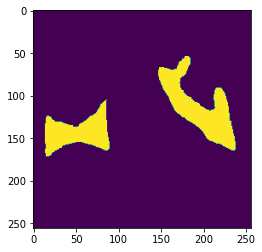

In [44]:
plt.imshow(val_mask_dataset[0])

In [16]:
test_mask_dataset[0][100]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],

In [29]:
def dice_coef(y_true, y_pred,smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)
from tensorflow.keras import backend as K 
smooth = 1


def iou_score(y_pred, y_true, smooth=1):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    union = K.sum(y_true, -1) + K.sum(y_pred, -1) - intersection
    iou = (intersection + smooth)/(union + smooth)
    return iou
from tensorflow.keras.models import load_model
model = load_model('attention_unet_infection_lung model.hdf5',custom_objects={'dice_coef_loss':dice_coef_loss,'dice_coef':dice_coef,'iou_score':iou_score})

In [30]:
#x=test_image_dataset[100].reshape(1,256,256,1)
pred=model.predict(test_image_dataset)

19/19 [==============================] - 2s 84ms/step


In [31]:
y_pred_thresholded=pred>0.5
intersection=np.logical_and(test_mask_dataset,y_pred_thresholded)
union=np.logical_or(test_mask_dataset,y_pred_thresholded)
iou_score=np.sum(intersection)/np.sum(union)
print(iou_score)

0.6797256895353261


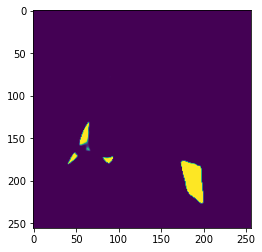

In [32]:
plt.imshow(pred[8])

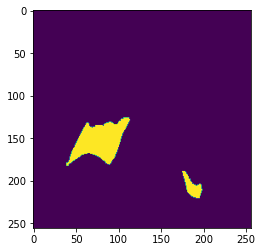

In [27]:
plt.imshow(test_mask_dataset[8])